In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sklearn                          
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection,metrics
from statistics import mean

In [2]:
data=pd.read_csv(r'C:\Users\Nikos\Documents\datasets\adult_train.csv')
data.replace(' ?', np.NaN,inplace=True)     
data.head(30)

f1                 f2      f3             f4  f5                      f6  \
0   39          State-gov   77516      Bachelors  13           Never-married   
1   50   Self-emp-not-inc   83311      Bachelors  13      Married-civ-spouse   
2   38            Private  215646        HS-grad   9                Divorced   
3   53            Private  234721           11th   7      Married-civ-spouse   
4   28            Private  338409      Bachelors  13      Married-civ-spouse   
5   37            Private  284582        Masters  14      Married-civ-spouse   
6   49            Private  160187            9th   5   Married-spouse-absent   
7   52   Self-emp-not-inc  209642        HS-grad   9      Married-civ-spouse   
8   31            Private   45781        Masters  14           Never-married   
9   42            Private  159449      Bachelors  13      Married-civ-spouse   
10  37            Private  280464   Some-college  10      Married-civ-spouse   
11  30          State-gov  141297      Bachelors  13      Married-civ-spouse   
12  23            Private  122272      Bachelors  13           Never-married   
13  32            Private  205019     Assoc-acdm  12           Never-married   
14  40            Private  121772      Assoc-voc  11      Married-civ-spouse   
15  34            Private  245487        7th-8th   4      Married-civ-spouse   
16  25   Self-emp-not-inc  176756        HS-grad   9           Never-married   
17  32            Private  186824        HS-grad   9           Never-married   
18  38            Private   28887           11th   7      Married-civ-spouse   
19  43   Self-emp-not-inc  292175        Masters  14                Divorced   
20  40            Private  193524      Doctorate  16      Married-civ-spouse   
21  54            Private  302146        HS-grad   9               Separated   
22  35        Federal-gov   76845            9th   5      Married-civ-spouse   
23  43            Private  117037           11th   7      Married-civ-spouse   
24  59            Private  109015        HS-grad   9                Divorced   
25  56          Local-gov  216851      Bachelors  13      Married-civ-spouse   
26  19            Private  168294        HS-grad   9           Never-married   
27  54                NaN  180211   Some-college  10      Married-civ-spouse   
28  39            Private  367260        HS-grad   9                Divorced   
29  49            Private  193366        HS-grad   9      Married-civ-spouse   

                    f7              f8                   f9      f10    f11  \
0         Adm-clerical   Not-in-family                White     Male   2174   
1      Exec-managerial         Husband                White     Male      0   
2    Handlers-cleaners   Not-in-family                White     Male      0   
3    Handlers-cleaners         Husband                Black     Male      0   
4       Prof-specialty            Wife                Black   Female      0   
5      Exec-managerial            Wife                White   Female      0   
6        Other-service   Not-in-family                Black   Female      0   
7      Exec-managerial         Husband                White     Male      0   
8       Prof-specialty   Not-in-family                White   Female  14084   
9      Exec-managerial         Husband                White     Male   5178   
10     Exec-managerial         Husband                Black     Male      0   
11      Prof-specialty         Husband   Asian-Pac-Islander     Male      0   
12        Adm-clerical       Own-child                White   Female      0   
13               Sales   Not-in-family                Black     Male      0   
14        Craft-repair         Husband   Asian-Pac-Islander     Male      0   
15    Transport-moving         Husband   Amer-Indian-Eskimo     Male      0   
16     Farming-fishing       Own-child                White     Male      0   
17   Machine-op-inspct       Unmarried                White     Male      0   
18               Sales

In [3]:
data.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]

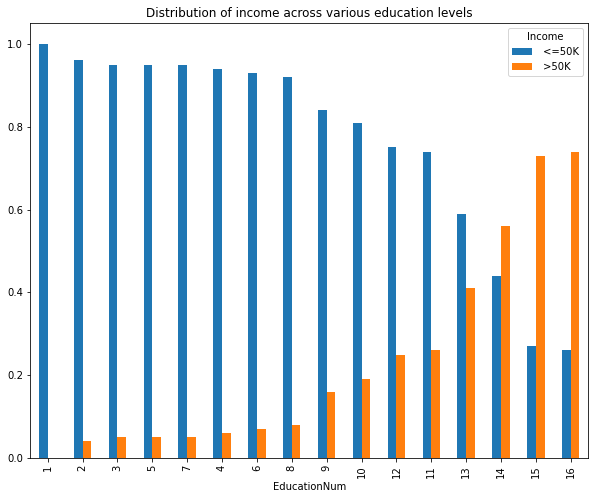

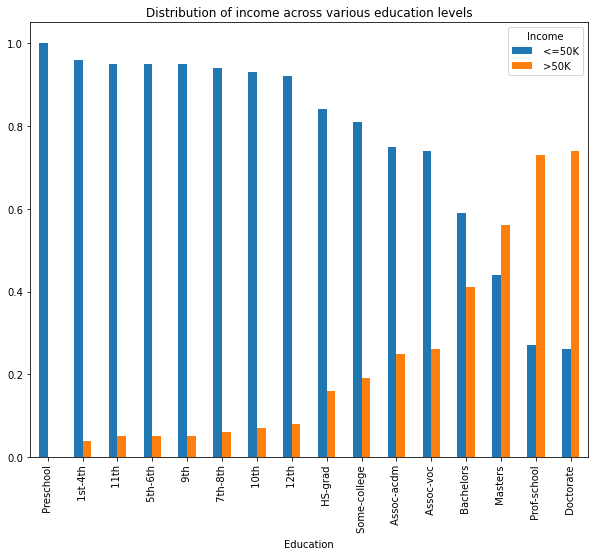

In [4]:
plot_educationnum=round(pd.crosstab(data.EducationNum,data.Income).div(pd.crosstab(data.EducationNum,data.Income).apply(sum,1),axis=0),2)
plot_educationnum.sort_values(by = ' >50K',inplace=True)
ax=plot_educationnum.plot(kind='bar',title='Distribution of income across various education levels',figsize=(10,8))

plot_education=round(pd.crosstab(data.Education,data.Income).div(pd.crosstab(data.Education,data.Income).apply(sum,1),axis=0),2)
plot_education.sort_values(by = ' >50K',inplace=True)
ax=plot_education.plot(kind='bar',title='Distribution of income across various education levels',figsize=(10,8))

In [5]:
training_data=data.copy()
training_data.dropna(axis=0,how='any',inplace=True)   #drop all NaN
training_label=training_data["Income"].map({' <=50K':0,' >50K':1})  #convert income to 0-1
training_data.drop(["Income"],axis=1,inplace=True)
training_data.drop(["Education"],axis=1,inplace=True)  

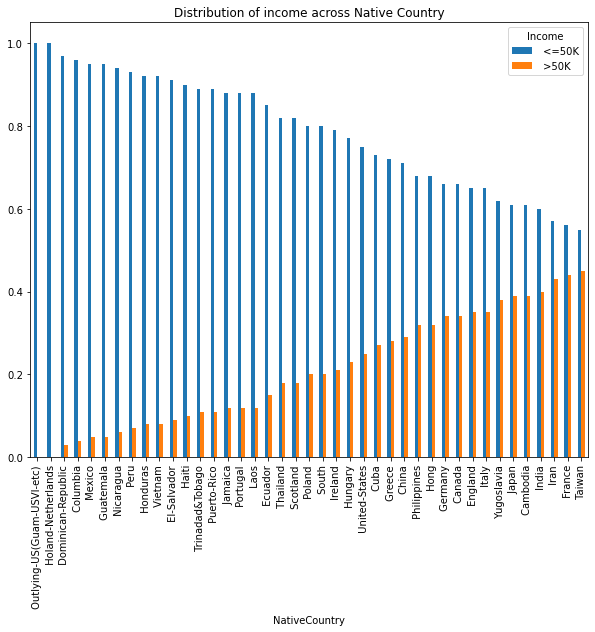

In [6]:
plot_nativecountry=round(pd.crosstab(training_data.NativeCountry,data.Income).div(pd.crosstab(training_data.NativeCountry,data.Income).apply(sum,1),axis=0),2)
plot_nativecountry.sort_values(by = ' >50K',inplace=True)
ax=plot_nativecountry.plot(kind='bar',title='Distribution of income across Native Country',figsize=(10,8))

In [7]:
training_data.NativeCountry.value_counts(normalize=True) * 100
training_data['NativeCountry'] = [' United States' if i == ' United-States'  else ' Out of United States' for i in training_data['NativeCountry']]

In [8]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

scaler.fit(training_data.select_dtypes("int64"))  
train_data = scaler.transform(training_data.select_dtypes("int64"))  
train_data=pd.DataFrame(train_data)
train_data.columns = [
    "Age", "fnlwgt", "EducationNum",
    "CapitalGain", "CapitalLoss", "HoursPerWeek"]

In [9]:
train_data.set_index(training_data.index,inplace=True)

In [10]:
training_data_categorical = pd.get_dummies(training_data.select_dtypes('object'))
training_data_categorical=training_data_categorical.astype(dtype='category')
training_data_non_categorical = train_data                                         
training_data_onehotencoded = pd.concat([training_data_non_categorical, training_data_categorical], axis=1,join='inner')

In [11]:
from sklearn.feature_selection import SelectKBest,chi2
np.seterr(divide='ignore',invalid='ignore')
kbest_selector=SelectKBest(k=training_data_onehotencoded.shape[1])

training_selected_features=kbest_selector.fit_transform(training_data_onehotencoded,training_label)

selected_cols = kbest_selector.get_support(indices=True)
selected_feature_names = training_data_onehotencoded.columns.values[selected_cols]

training_selected_features=pd.DataFrame(training_selected_features)

scores = kbest_selector.scores_[kbest_selector.get_support()]
selected_feature_names_scores = list(zip(selected_feature_names, scores))

Feat_F1score_combined = pd.DataFrame(data = selected_feature_names_scores, columns=['Feature_names', 'F_Scores'])
Feat_F1score_combined = Feat_F1score_combined.sort_values(['F_Scores', 'Feature_names'], ascending = [False, True])

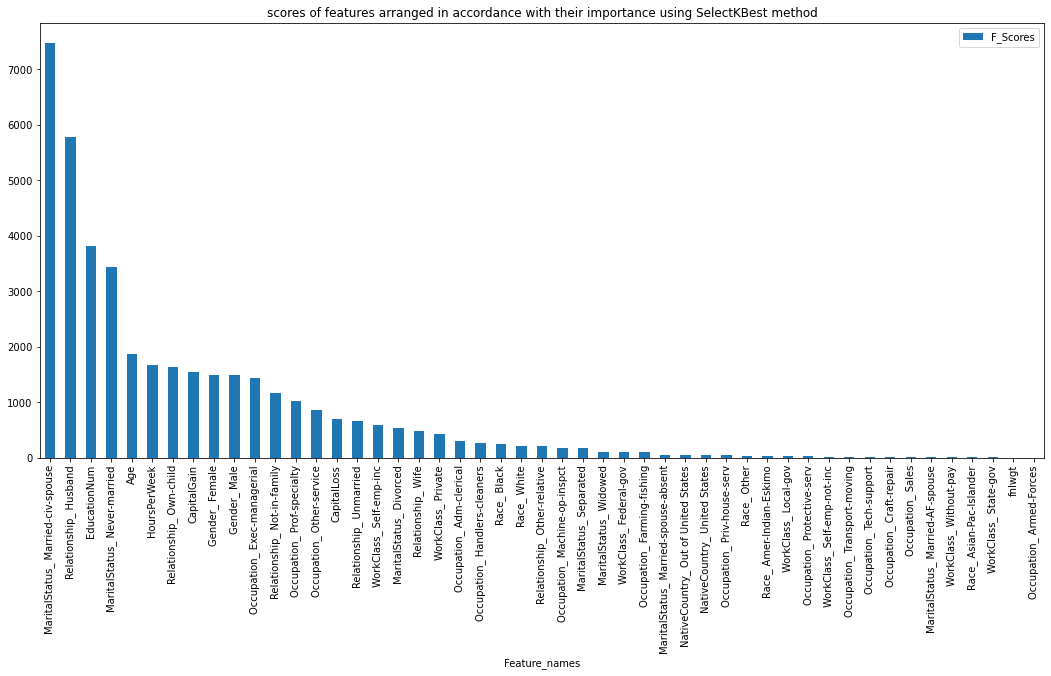

In [12]:
Feat_F1score_combined.plot(x='Feature_names',y='F_Scores',kind='bar',title='scores of features arranged in accordance with their importance using SelectKBest method',figsize=(18,8))
kbest_selector=SelectKBest(k=30)
training_selected_features=kbest_selector.fit_transform(training_data_onehotencoded,training_label)

In [13]:
train_data_array=np.asarray(training_selected_features)
training_label_array=np.asarray(training_label)

In [14]:
test_data=pd.read_csv(r'C:\Users\Nikos\Documents\datasets\adult_test.csv')
test_data.replace(' ?', np.NaN,inplace=True)

test_data.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]
testing_data=test_data
testing_data.dropna(axis=0,how='any',inplace=True)
testing_label=testing_data["Income"].map({' <=50K.':0,' >50K.':1}) 
testing_data.drop(["Income"],axis=1,inplace=True)

testing_data.drop(["Education"],axis=1,inplace=True)   

test_data = scaler.transform(testing_data.select_dtypes("int64"))
test_data=pd.DataFrame(test_data)
test_data.columns = [
    "Age", "fnlwgt", "EducationNum",
    "CapitalGain", "CapitalLoss", "HoursPerWeek"]  

test_data.set_index(testing_data.index,inplace=True)

testing_data['NativeCountry'] = [' United States' if i == ' United-States'  else ' Out of United States' for i in testing_data['NativeCountry']]



testing_data_categorical = pd.get_dummies(testing_data.select_dtypes('object'))
testing_data_categorical=testing_data_categorical.astype(dtype='category')
testing_data_non_categorical =   test_data
testing_data_onehotencoded = pd.concat([testing_data_non_categorical, testing_data_categorical], axis=1,join='inner')


missing_test_col_set=set(training_data_onehotencoded.columns.values.tolist()).difference(testing_data_onehotencoded.columns.values.tolist())

for i in range(len(list(missing_test_col_set))):
    testing_data_onehotencoded.loc[ : , list(missing_test_col_set)[i]] = 0
    
testing_selected_features=kbest_selector.transform(testing_data_onehotencoded)

In [23]:
hidden_layer_opt=4

mlp_clf=MLPClassifier(hidden_layer_sizes=hidden_layer_opt)
mlp_clf.fit(training_selected_features,training_label)

predicted_label = mlp_clf.predict(testing_selected_features)
testing_accuracy=metrics.accuracy_score(testing_label,predicted_label)
print(testing_accuracy)

report=metrics.classification_report(testing_label,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(testing_label,predicted_label,average='macro')
print(auc_score)

0.849933598937583
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11360
           1       0.72      0.63      0.68      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.78      0.79     15060
weighted avg       0.85      0.85      0.85     15060

0.7774236296155311
